<a href="https://colab.research.google.com/github/aarushiramesh/Forecasting_Power/blob/main/Power_Data_Analysis0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Power Grid Analysis:**

Performing data analysis on Electricity data from http://www.ercot.com/content/wcm/lists/166967/2019_Long-Term_Hourly_Peak_Demand_and_Energy_Forecast_Report.pdf 

#**Data Analysis: Texas Areas, 8 Weather Zones**


*   Data Preprocessing
*   Feature Extraction
*   Correlation Matrices
*   Analysis of data





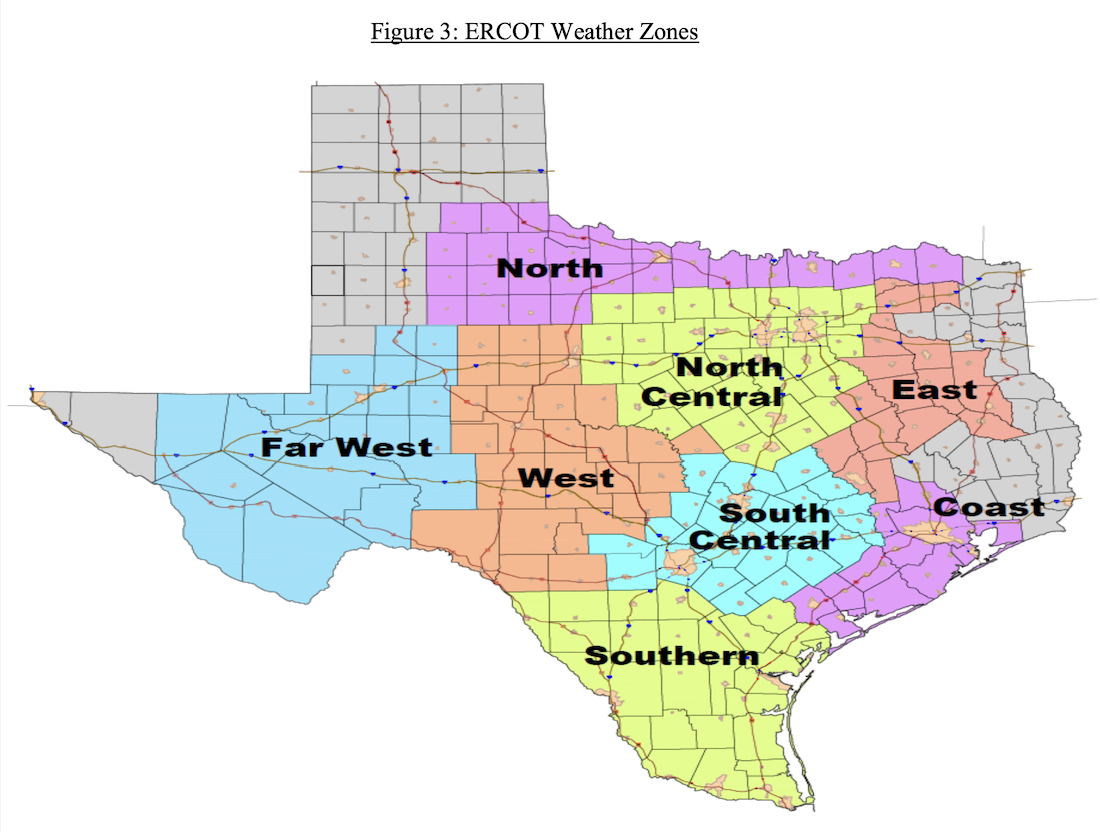

There are 8 weather regions in Texas, as per ERCOT: **North, Far West, West, North Central, East, South Central, Coast, Southern.** 

These weather zones represent a region/area where climatological characteristics are similar. As per a source from ERCOT, 'in order to reflect the unique weather and load characteristics of each zone, seperate forcasting models were developed for each of the weather zones'.

In [ ]:
# forecasting electric demand for every year
# - feature variables:
# ---> population
# ---> electricity generation
# ---> weather record
# ---> electricity demand

# - target variable:
# ---> electricity demand

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataframe = pd.read_excel('Native_Load_2021.xlsx')
print(dataframe)

           Hour Ending         COAST  ...         WEST         ERCOT
0     01/01/2021 01:00  11047.018793  ...  1440.188560  43719.849616
1     01/01/2021 02:00  10954.470339  ...  1421.385715  43321.050347
2     01/01/2021 03:00  10883.657240  ...  1405.544826  43063.067063
3     01/01/2021 04:00  10926.482445  ...  1402.283632  43090.059203
4     01/01/2021 05:00  11019.796399  ...  1405.094618  43486.590073
...                ...           ...  ...          ...           ...
2154  03/31/2021 20:00  11129.487631  ...  1002.690678  38683.855217
2155  03/31/2021 21:00  11174.240569  ...  1036.701723  39411.102908
2156  03/31/2021 22:00  10851.356997  ...  1027.212128  38353.271112
2157  03/31/2021 23:00  10283.128852  ...   981.059057  36295.697097
2158  03/31/2021 24:00   9705.201171  ...   929.483773  34046.966791

[2159 rows x 10 columns]


In [ ]:
dataframe

,Hour Ending,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,01/01/2021 01:00,11047.018793,1517.435253,3978.220628,838.352810,13575.277728,3545.093310,7778.262533,1440.188560,43719.849616
1,01/01/2021 02:00,10954.470339,1523.683893,3975.757045,825.123437,13340.337915,3586.547882,7693.744119,1421.385715,43321.050347
2,01/01/2021 03:00,10883.657240,1519.800916,3969.812081,819.551228,13311.625189,3586.124059,7566.951524,1405.544826,43063.067063
3,01/01/2021 04:00,10926.482445,1523.472963,3983.487761,820.612439,13356.442066,3570.592369,7506.685527,1402.283632,43090.059203
4,01/01/2021 05:00,11019.796399,1565.625573,3980.940744,831.607158,13528.651487,3590.902242,7563.971854,1405.094618,43486.590073
...,...,...,...,...,...,...,...,...,...,...
2154,03/31/2021 20:00,11129.487631,1352.758575,3663.799719,686.859949,11242.485895,3516.079471,6089.693299,1002.690678,38683.855217
2155,03/31/2021 21:00,11174.240569,1397.608189,3715.941516,713.477111,11612.281443,3512.414695,6248.437661,1036.701723,39411.102908
2156,03/31/2021 22:00,10851.356997,1359.662192,3731.127234,698.894646,11268.171444,3368.527539,6048.318932,1027.212128,38353.271112
2157,03/31/2021 23:00,10283.128852,1284.715362,3710.349672,662.600399,10583.621134,3148.531132,5641.691490,981.059057,36295.697097


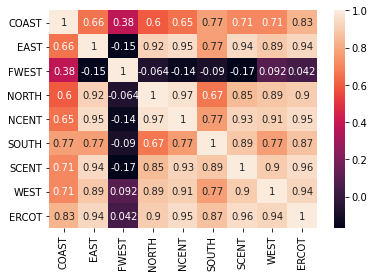

In [ ]:
corr_matrix = dataframe.corr()
sn.heatmap(corr_matrix, annot=True)

Higher correlation can be seen in closer regions, for instance the correlation between North and North Central is high, similar to the correlation between South and South Central. Far West has a negative correlation with respect to most other regions, except for the West + Coastal regions.

In [ ]:
time = dataframe['Hour Ending'].values
time

array(['01/01/2021 01:00', '01/01/2021 02:00', '01/01/2021 03:00', ...,
       '03/31/2021 22:00', '03/31/2021 23:00', '03/31/2021 24:00'],
      dtype=object)

<function matplotlib.pyplot.show>

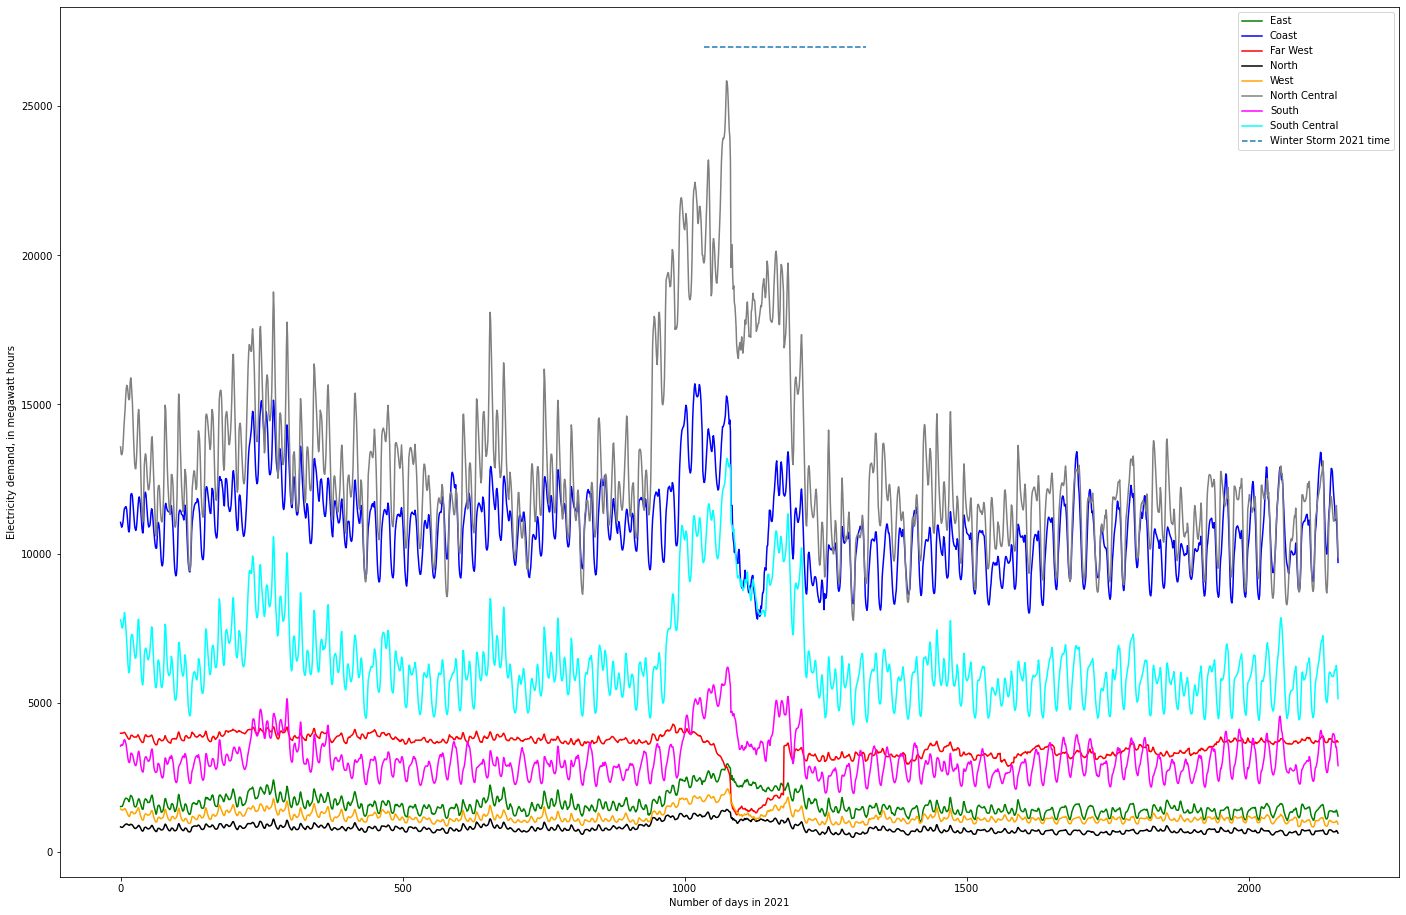

In [ ]:
#set figure size
plt.figure(figsize = (24, 16))

time = np.arange(2159)

plt.plot(time, dataframe['EAST'].values, color='green', label='East')
plt.plot(time, dataframe['COAST'].values, color='blue', label='Coast')
plt.plot(time, dataframe['FWEST'].values, color='red', label='Far West')
plt.plot(time, dataframe['NORTH'].values, color='black', label='North')
plt.plot(time, dataframe['WEST'].values, color='orange', label='West')
plt.plot(time, dataframe['NCENT'].values, color='grey', label='North Central')
plt.plot(time, dataframe['SOUTH'].values, color='magenta', label='South')
plt.plot(time, dataframe['SCENT'].values, color='cyan', label='South Central')

winter_x = [1035, 1321]
winter_y = [27000, 27000]
plt.ylabel('Electricity demand, in megawatt hours')
plt.xlabel('Number of days in 2021')
plt.plot(winter_x, winter_y, linestyle='dashed', label='Winter Storm 2021 time')

plt.legend()
plt.show

As we can see from the graph above, every weather region reaches a high power load around the beginnning of the winter storm time. There is a sudden spike during this time, across all regions!

This makes sense since the demand for power will increase due to the changes in the weather (cold weather, more electricity for electric heaters, warmth, food..etc.) A few days after the peaks in the demand, the overall demand in every region drops, indicating the rolling blackouts that was implemented to stablize the supply and demand of power.